# 📊 EDA – Telco Customer Churn
Analiza danych o klientach operatora komórkowego.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/telco.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
# Informacje o zbiorze danych
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
# Sprawdzenie problemów z TotalCharges (typ object, ale powinno być liczbowy)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].isnull().sum()

np.int64(11)

In [4]:
# Usunięcie wierszy z brakami
df.dropna(inplace=True)

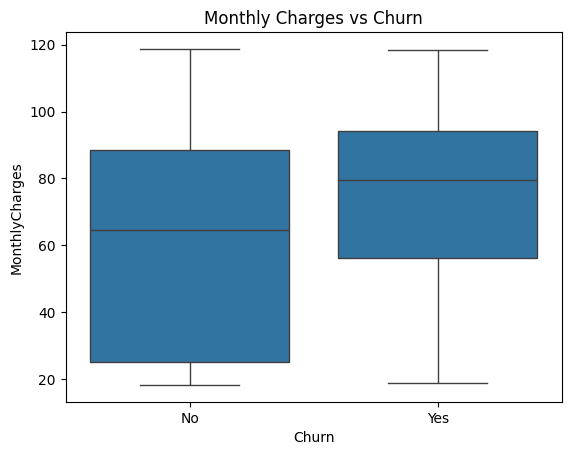

In [5]:
# Wizualizacja Churn vs MonthlyCharges
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges vs Churn')
plt.show()

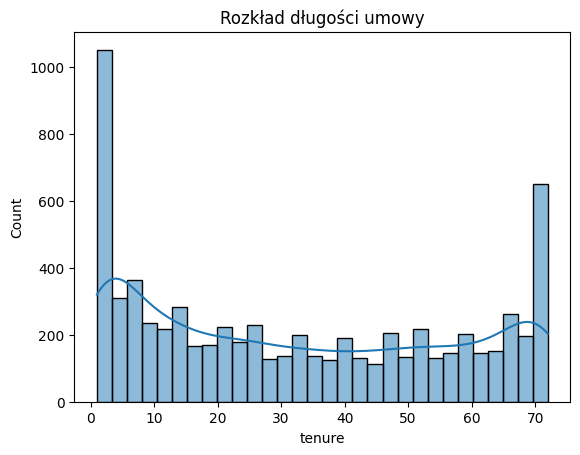

In [6]:
# Rozkład długości umowy (tenure)
sns.histplot(df['tenure'], bins=30, kde=True)
plt.title('Rozkład długości umowy')
plt.show()

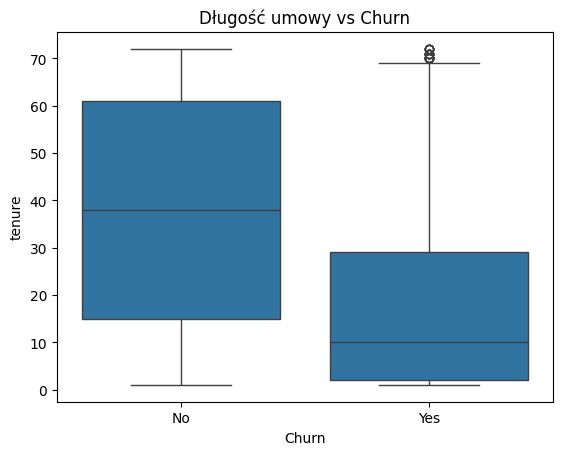

In [7]:
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Długość umowy vs Churn')
plt.show()

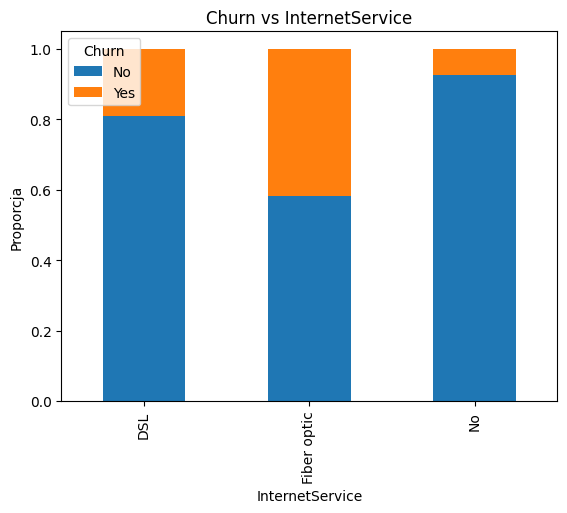

In [8]:
pd.crosstab(df['InternetService'], df['Churn'], normalize='index').plot(kind='bar', stacked=True)
plt.title('Churn vs InternetService')
plt.ylabel('Proporcja')
plt.show()

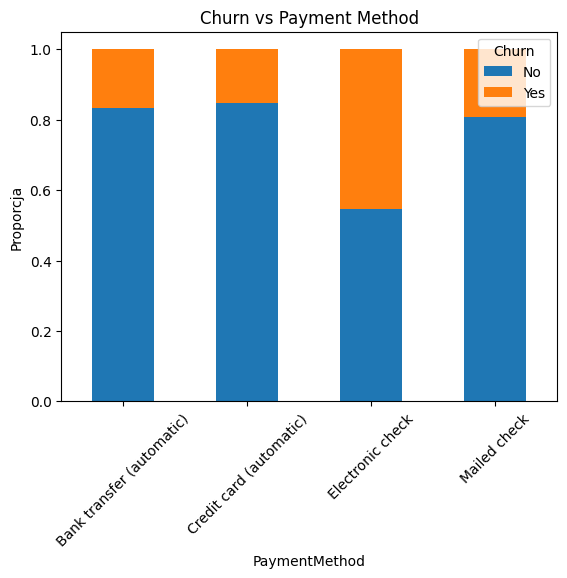

In [9]:
pd.crosstab(df['PaymentMethod'], df['Churn'], normalize='index').plot(kind='bar', stacked=True)
plt.title('Churn vs Payment Method')
plt.ylabel('Proporcja')
plt.xticks(rotation=45)
plt.show()


## 🧠 Podsumowanie EDA – Telco Customer Churn

W wyniku eksploracyjnej analizy danych odkryto kilka istotnych zależności:

### 📌 1. `MonthlyCharges` vs `Churn`
- Klienci, którzy **odchodzą**, mają zwykle **wyższe miesięczne opłaty**.
- Wyższe koszty mogą zwiększać ryzyko rezygnacji.

### 📌 2. `tenure` (długość umowy) vs `Churn`
- Osoby o krótkim stażu (1–12 mies.) częściej odchodzą.
- Klienci, którzy są z firmą dłużej, są bardziej lojalni.
- Dwuszczytowy rozkład wskazuje na dwie grupy: nowych i długoletnich klientów.

### 📌 3. Usługi vs `Churn`
- Osoby korzystające z **Fiber optic** i nieposiadające **zabezpieczeń (OnlineSecurity, TechSupport)** częściej rezygnują.
- Brak usług pomocniczych może zwiększać frustrację klienta.

### 📌 4. `PaymentMethod` vs `Churn`
- Klienci płacący przez **Electronic check** mają wyraźnie wyższy wskaźnik churnu.
- Klienci z **automatycznymi płatnościami** (karta kredytowa, bank transfer) są bardziej lojalni.

---

### ✅ Wnioski:
- Cecha `tenure` i `MonthlyCharges` są **silnie predykcyjne** – powinny zostać w modelu.
- Kilka zmiennych kategorycznych będzie wymagało zakodowania (`OneHotEncoder` lub `LabelEncoder`).
- Zbiór danych jest gotowy do budowy modelu klasyfikacyjnego churnu.
